# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ferdy Luqman Djunaedi
- **Email:** ferdyluqman17@gmail.com
- **ID Dicoding:** MRZMNO7YRPYQ

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda sewaan berdasarkan waktu (harian dan per jam) serta faktor musiman?
- Apa pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [42]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

### Assessing Data

In [43]:
print(day_df.info())
print(hour_df.info())

print(day_df.isnull().sum())
print(hour_df.isnull().sum())
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

### Cleaning Data

In [44]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

categorical_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
print(day_df.describe())

season_summary = day_df.groupby('season')['cnt'].agg(['mean', 'median']).reset_index()
print(season_summary)

weather_summary = day_df.groupby('weathersit')['cnt'].agg(['mean', 'median']).reset_index()
print(weather_summary)

          instant               dteday          yr        mnth        temp  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.495385   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.059130   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.337083   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.498333   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.655417   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    0.861667   
std    211.165812                  NaN    0.500342    3.451913    0.183051   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean     0.474354    0.627894    0.190486   848.176471  3656.172367   
min      0.079070    0.000000    0.022392     2.000000    20.000000   
25%      0.33

<ipython-input-45-9335637d6b59>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_summary = day_df.groupby('season')['cnt'].agg(['mean', 'median']).reset_index()
<ipython-input-45-9335637d6b59>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_summary = day_df.groupby('weathersit')['cnt'].agg(['mean', 'median']).reset_index()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

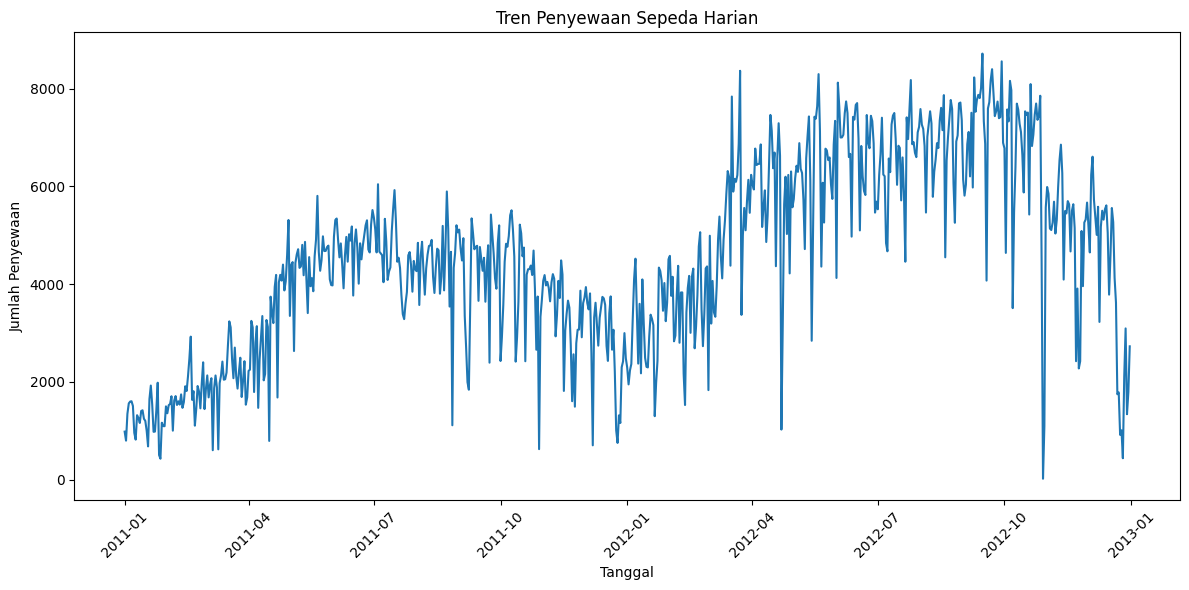

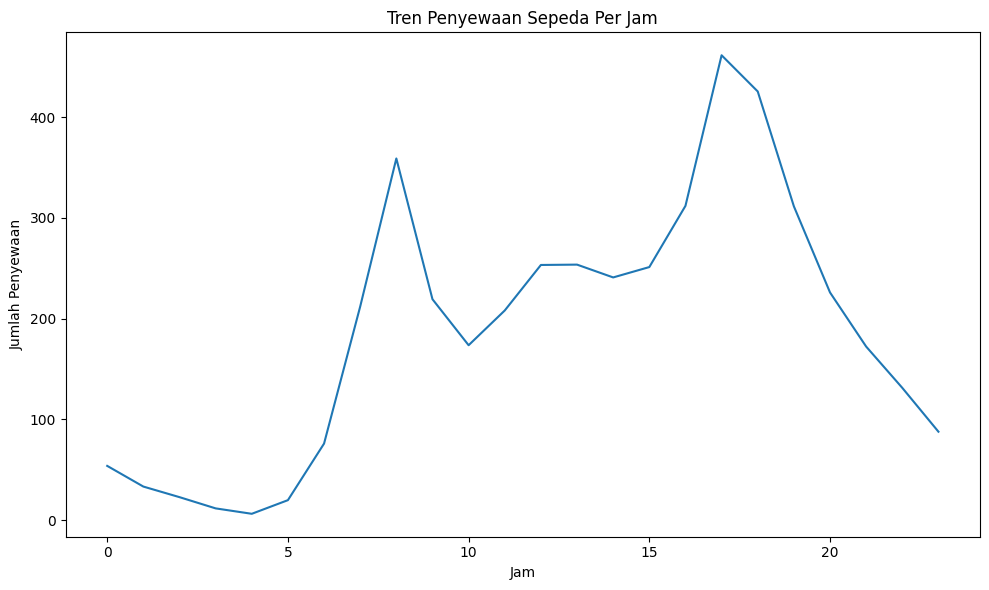

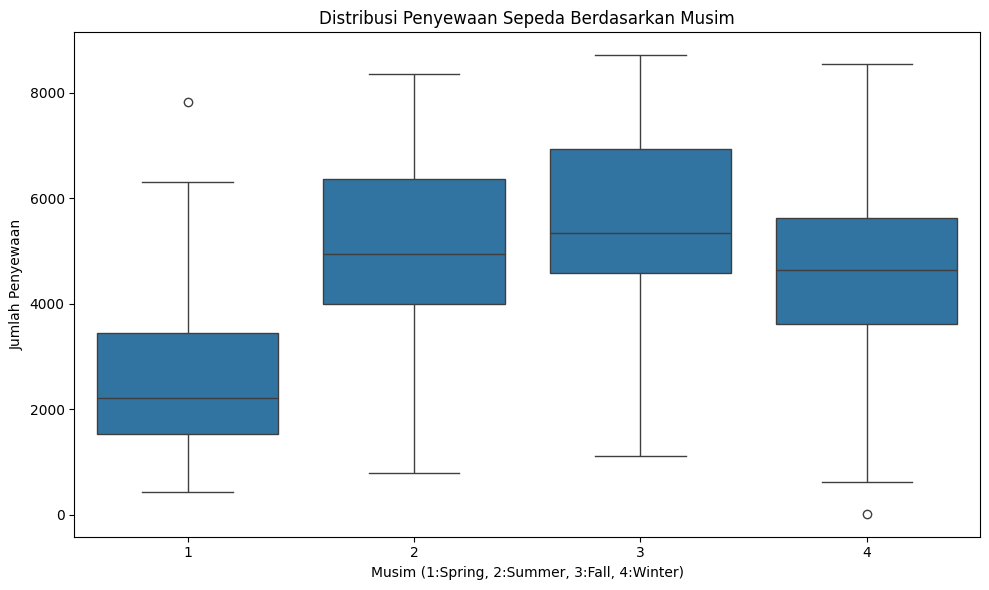

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot(data=day_df, x='dteday', y='cnt', errorbar=None)
plt.title("Tren Penyewaan Sepeda Harian")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=hour_df, x='hr', y='cnt', errorbar=None)
plt.title("Tren Penyewaan Sepeda Per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=day_df, x='season', y='cnt')
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1:Spring, 2:Summer, 3:Fall, 4:Winter)")
plt.ylabel("Jumlah Penyewaan")
plt.tight_layout()
plt.show()

### Pertanyaan 2:

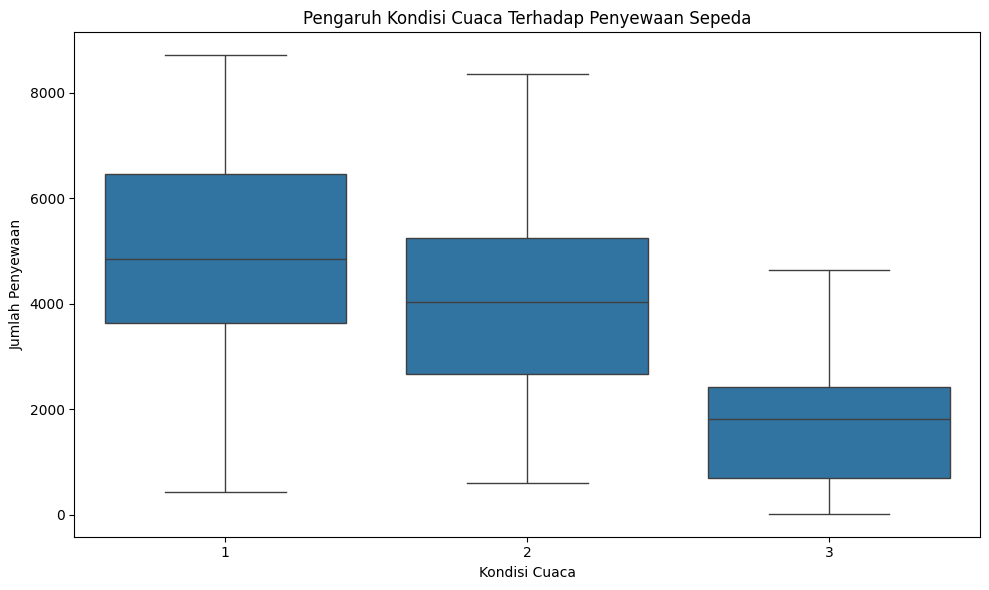

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title("Pengaruh Kondisi Cuaca Terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

1. **Tren Penyewaan Sepeda:**
   - Terlihat adanya peningkatan jumlah penyewaan sepeda dari waktu ke waktu.
   - Jumlah penyewaan tertinggi terjadi pada musim gugur (Fall) dan terendah saat musim semi (Spring).
   - Pola penyewaan per jam menunjukkan lonjakan pada pagi hari (sekitar pukul 8) dan sore hari (sekitar pukul 17-18), yang mengindikasikan bahwa banyak pengguna menggunakan sepeda untuk keperluan berangkat dan pulang kerja.
2. **Pengaruh Kondisi Cuaca:**
   - Jumlah penyewaan sepeda cenderung tinggi pada kondisi cuaca cerah hingga sedikit berawan.
   - Kondisi cuaca buruk seperti hujan, salju, atau kabut menyebabkan penurunan signifikan pada jumlah penyewaan sepeda.